# 1. Dataset & Data exploration 

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip
import nltk
import spacy
import string
import re
import warnings

from nltk.corpus import stopwords
from nltk.collocations import *
from collections import Counter
from nltk.stem import porter
from wordcloud import WordCloud, STOPWORDS

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('genesis')
nltk.download('averaged_perceptron_tagger')

stop_words = set(stopwords.words('english'))
stemmer = porter.PorterStemmer()

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

nlp = spacy.load("en_core_web_sm")

nltk.download('punkt')
nltk.download('brown')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\98936\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\98936\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package genesis to
[nltk_data]     C:\Users\98936\AppData\Roaming\nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\98936\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\98936\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\98936\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

## Importing the dataset

In [2]:
# Importing the dataset
url = 'https://raw.githubusercontent.com/shahrzadko/NLPDigitalMusic/main/Digital_Music_5.json?token=GHSAT0AAAAAAB6LOL42SKHPCCMIVYPOC4REY7AKE2Q'
df_raw = pd.read_json(url)
full_df = pd.DataFrame.from_records(df_raw['data'])


In [3]:
#import pandas_profiling 
#report = pandas_profiling.ProfileReport(full_df)
#report.to_file('report')

In [4]:
full_df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5.0,3,True,"06 3, 2013",A2TYZ821XXK2YZ,3426958910,{'Format:': ' Audio CD'},Garrett,"This is awesome to listen to, A must-have for ...",Slayer Rules!,1370217600,NaN
1,5.0,NaN,True,"10 11, 2014",A3OFSREZADFUDY,3426958910,{'Format:': ' Audio CD'},Ad,bien,Five Stars,1412985600,NaN
2,5.0,NaN,True,"02 11, 2014",A2VAMODP8M77NG,3426958910,{'Format:': ' Audio CD'},JTGabq,It was great to hear the old stuff again and I...,SLAYER!!!!!!!!!!!!!!!!!!!!!,1392076800,NaN
3,4.0,3,False,"12 7, 2013",AAKSLZ9IDTEH0,3426958910,{'Format:': ' Audio CD'},john F&#039;n doe,well best of's are a bit poison normally but t...,slayer greatest hits! you mean everything righ...,1386374400,NaN
4,5.0,NaN,True,"06 12, 2016",A3OH43OZJLKI09,5557706259,{'Format:': ' Audio CD'},melinda a goodman,What can I say? This is Casting Crowns!!!This ...,"This is a good, blessing filled",1465689600,NaN


## exploration 

In [5]:
full_df['overall'].describe()

count    169781.000000
mean          4.700019
std           0.713420
min           1.000000
25%           5.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

In [6]:
#Number of reviews
print('- Number of reviews:', len(full_df))

#Number of different products reviewed
print('- Number of different products reviewed: ', len(full_df.asin.unique()))

#Number of people who reviewed
print('- Number of people who reviewed: ', len(full_df.reviewerID.unique()))

#Reviews range and average
print('- max rating: ', full_df.overall.max())
print('- min rating: ', full_df.overall.min())
print('- avg rating: ', full_df.overall.mean())

#Time range
start = pd.to_datetime(full_df['unixReviewTime'],unit='s').min().date()
end = pd.to_datetime(full_df['unixReviewTime'],unit='s').max().date()

print('- First review: ', start)
print('- Last review: ', end)


- Number of reviews: 169781
- Number of different products reviewed:  11797
- Number of people who reviewed:  16566
- max rating:  5.0
- min rating:  1.0
- avg rating:  4.700019436803883
- First review:  1998-07-09
- Last review:  2018-09-26


Distribution of rating

Text(0, 0.5, 'reiew counts')

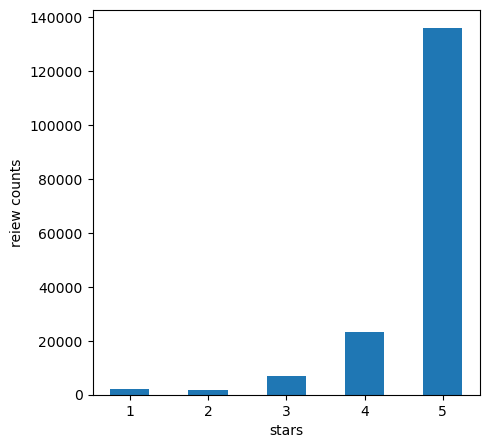

In [7]:
ax = full_df.overall.hist(grid=False, bins=np.arange(0.75,5.75,0.5),figsize=(5,5))

ax.set_xlabel("stars")
ax.set_ylabel("reiew counts")

Distribution of reviews per product

In [8]:
reviews_per_asin = full_df.asin.value_counts()
reviews_per_asin

B00CZF8B68    574
B00BWGHIHY    316
B00136J7ZE    294
B00EH49FRE    283
B00136NUG6    262
             ... 
B000W1S2WU      1
B00125MGQI      1
B001QET6G8      1
B001664ADA      1
B00138APMQ      1
Name: asin, Length: 11797, dtype: int64

reviews product-counts
5      2072
6      1506
7      1050
8       824
9       684
       ... 
146       1
147       1
148       1
152       1
574       1
Name: asin, Length: 163, dtype: int64


Text(0, 0.5, 'product counts')

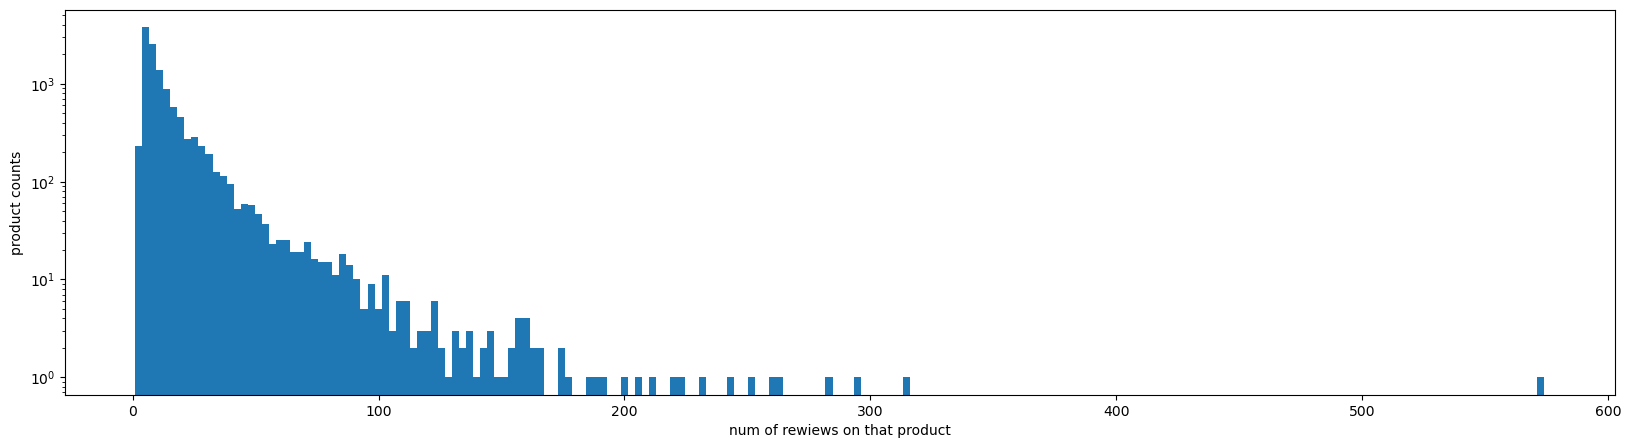

In [9]:
print("reviews product-counts")
print(reviews_per_asin.value_counts())

ax = reviews_per_asin.hist(log=True,grid=False,bins=200,figsize=(20,5))
ax.set_xlabel("num of rewiews on that product")
ax.set_ylabel("product counts")

Distribution of reviews per user

In [10]:
reviews_per_user = full_df.reviewerID.value_counts()
reviews_per_user

A3W4D8XOGLWUN5    791
A2H3JURQZOHVMB    314
A36EDWL4F3AASU    223
A165P3MOJV3OVZ    219
AVKHYC2D7MD56     214
                 ... 
A2VWLNEBMW4ITQ      2
A2M4D98UYXMUZE      2
A518S7KT78N51       2
A25HR6FTWBQ2NZ      1
A70WPHE33U5B        1
Name: reviewerID, Length: 16566, dtype: int64

reviews user-counts
5      4559
6      2798
7      1927
8      1288
9       974
       ... 
101       1
102       1
314       1
106       1
791       1
Name: reviewerID, Length: 125, dtype: int64


Text(0, 0.5, 'user counts')

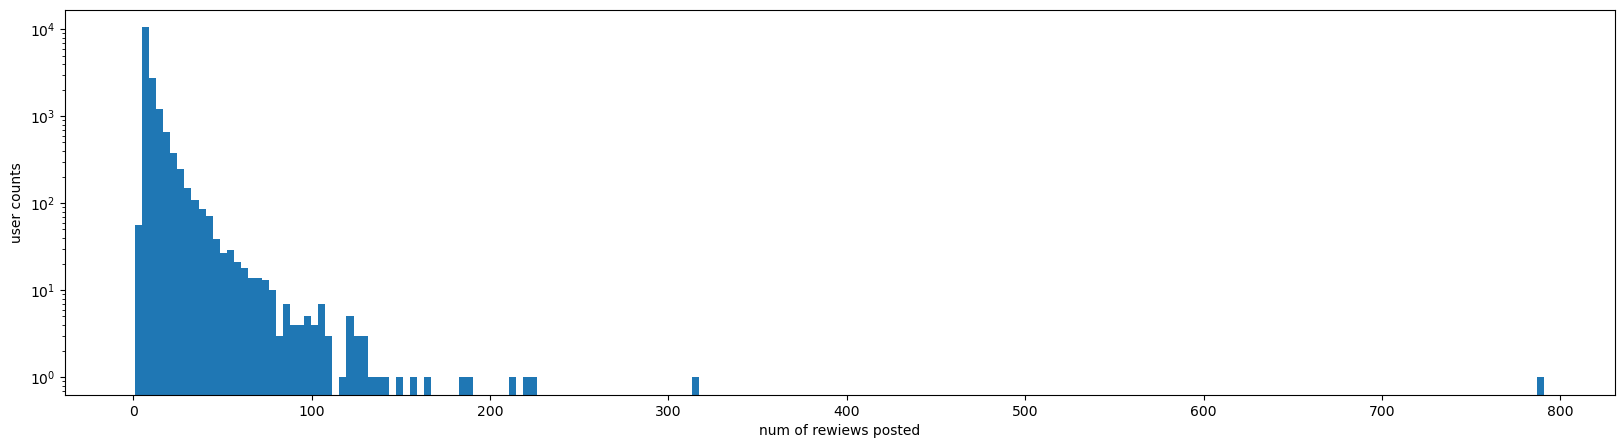

In [11]:
print("reviews user-counts")
print(reviews_per_user.value_counts())

ax = reviews_per_user.hist(log=True,grid=False,bins=200,figsize=(20,5))
ax.set_xlabel("num of rewiews posted")
ax.set_ylabel("user counts")


Shape of the dataset: (169781, 12)


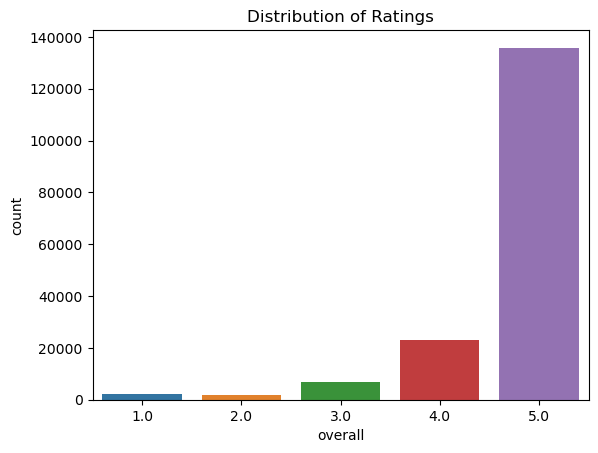

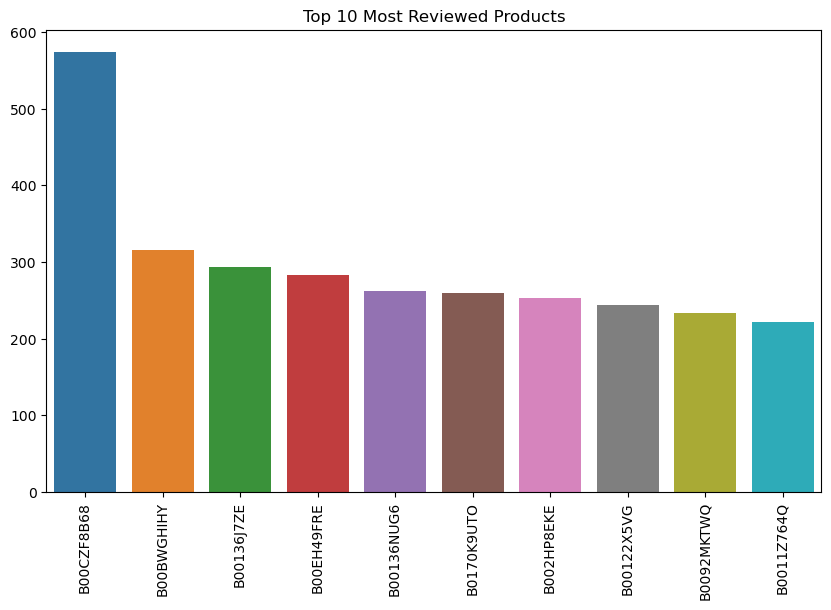

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check the shape of the dataset
print("Shape of the dataset:", full_df.shape)

# Check the distribution of ratings
sns.countplot(x='overall', data=full_df)
plt.title("Distribution of Ratings")
plt.show()

# Check the top 10 most reviewed products
top_products = full_df['asin'].value_counts().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title("Top 10 Most Reviewed Products")
plt.xticks(rotation=90)
plt.show()

# 2. Text basic pre-processing

based on the value of “rating of the product”:<br/> i. Ratings 4,5: Positive <br/>ii. Rating 3: Neutral <br/>iii. Ratings 1,2: Negative


In [13]:
full_df['Sentiment'] = np.where((full_df['overall'] > 3), 'Positive', 
                          np.where((full_df['overall'] < 3), 'Negative', 'Neutral'))
full_df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image,Sentiment
0,5.0,3,True,"06 3, 2013",A2TYZ821XXK2YZ,3426958910,{'Format:': ' Audio CD'},Garrett,"This is awesome to listen to, A must-have for ...",Slayer Rules!,1370217600,NaN,Positive
1,5.0,NaN,True,"10 11, 2014",A3OFSREZADFUDY,3426958910,{'Format:': ' Audio CD'},Ad,bien,Five Stars,1412985600,NaN,Positive
2,5.0,NaN,True,"02 11, 2014",A2VAMODP8M77NG,3426958910,{'Format:': ' Audio CD'},JTGabq,It was great to hear the old stuff again and I...,SLAYER!!!!!!!!!!!!!!!!!!!!!,1392076800,NaN,Positive
3,4.0,3,False,"12 7, 2013",AAKSLZ9IDTEH0,3426958910,{'Format:': ' Audio CD'},john F&#039;n doe,well best of's are a bit poison normally but t...,slayer greatest hits! you mean everything righ...,1386374400,NaN,Positive
4,5.0,NaN,True,"06 12, 2016",A3OH43OZJLKI09,5557706259,{'Format:': ' Audio CD'},melinda a goodman,What can I say? This is Casting Crowns!!!This ...,"This is a good, blessing filled",1465689600,NaN,Positive


In [14]:
full_df['Sentiment'].value_counts() 

Positive    158985
Neutral       6792
Negative      4004
Name: Sentiment, dtype: int64

## columns selection

In [15]:
full_df['verified'].value_counts()

True     148944
False     20837
Name: verified, dtype: int64

In [16]:
#full_df.info()

In [17]:
cols = ['reviewText','summary']
full_df['NewReview'] = full_df[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
full_df['NewReview'] = full_df['NewReview'].astype(str)

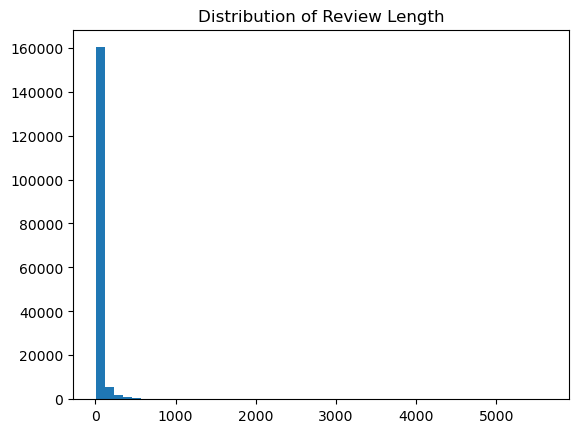

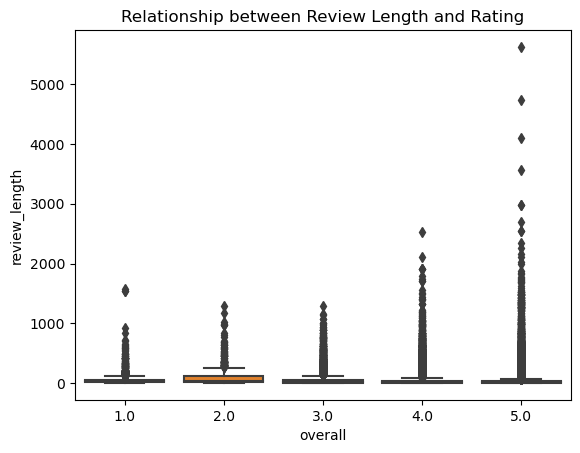

In [18]:
# Check the length of reviews
full_df['review_length'] = full_df['NewReview'].apply(lambda x: len(x.split()))
plt.hist(full_df['review_length'], bins=50)
plt.title("Distribution of Review Length")
plt.show()

# Check the relationship between review length and rating
sns.boxplot(x='overall', y='review_length', data=full_df)
plt.title("Relationship between Review Length and Rating")
plt.show()

In [19]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169781 entries, 0 to 169780
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         169781 non-null  float64
 1   vote            7611 non-null    object 
 2   verified        169781 non-null  bool   
 3   reviewTime      169781 non-null  object 
 4   reviewerID      169781 non-null  object 
 5   asin            169781 non-null  object 
 6   style           157989 non-null  object 
 7   reviewerName    169776 non-null  object 
 8   reviewText      169623 non-null  object 
 9   summary         169745 non-null  object 
 10  unixReviewTime  169781 non-null  int64  
 11  image           182 non-null     object 
 12  Sentiment       169781 non-null  object 
 13  NewReview       169781 non-null  object 
 14  review_length   169781 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(11)
memory usage: 18.3+ MB


In [20]:
#reviewerID will be useful later to see if they are outliers or not
music_review_df = full_df.drop(columns=['vote','reviewerID','image','reviewTime','reviewerID','style','reviewerName','unixReviewTime','reviewText','summary'])

In [21]:
music_review_df.head(2)

,overall,verified,asin,Sentiment,NewReview,review_length
0,5.0,True,3426958910,Positive,"This is awesome to listen to, A must-have for ...",25
1,5.0,True,3426958910,Positive,bien Five Stars,3


In [22]:
music_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169781 entries, 0 to 169780
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   overall        169781 non-null  float64
 1   verified       169781 non-null  bool   
 2   asin           169781 non-null  object 
 3   Sentiment      169781 non-null  object 
 4   NewReview      169781 non-null  object 
 5   review_length  169781 non-null  int64  
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 6.6+ MB


## sampling 

In [23]:
n_samples = 1000 # @param {type:"integer"}

#Getting the reviews from the dataset
sample_df=music_review_df.sample(n = n_samples)
# reviews = [str(review) for review in sample_df.NewReview.values] # moved



In [24]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 50040 to 138021
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   overall        1000 non-null   float64
 1   verified       1000 non-null   bool   
 2   asin           1000 non-null   object 
 3   Sentiment      1000 non-null   object 
 4   NewReview      1000 non-null   object 
 5   review_length  1000 non-null   int64  
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 47.9+ KB


In [25]:
sample_df.head()

,overall,verified,asin,Sentiment,NewReview,review_length
50040,4.0,True,B00138HM0O,Positive,I bought for a disco night and seems to be a c...,24
50764,5.0,True,B0013F0E16,Positive,"i love lionel richie songs, what can i say.......",23
119371,5.0,True,B01EZLMVDI,Positive,Great song!!! Five Stars,4
44348,5.0,True,B00136PTZ6,Positive,love Five Stars,3
87039,5.0,True,B00BYM83U2,Positive,Like it like it,4


In [26]:

reviews_raw = [str(review) for review in sample_df.NewReview.values]

# 3. Text representation (approaches in course module 2)

## Tokenisation, Lemmatization, Stemming, pos, entities

In [27]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

# Convert text to lowercase
sample_df['NewReview'] = sample_df['NewReview'].str.lower()

# Remove URLs
sample_df['NewReview'] = sample_df['NewReview'].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove HTML tags
sample_df['NewReview'] = sample_df['NewReview'].apply(lambda x: re.sub(r'<.*?>', '', x))

# Remove punctuation
sample_df['NewReview'] = sample_df['NewReview'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))


In [28]:

reviews = [str(review) for review in sample_df.NewReview.values]


In [29]:
# Tokenize the text
sample_df['NewReview'] = sample_df['NewReview'].apply(lambda x: word_tokenize(x))

# Remove stopwords and perform stemming
stop_words = set(stopwords.words('english'))
porter = PorterStemmer()

sample_df['NewReview'] = sample_df['NewReview'].apply(lambda x: [porter.stem(word) for word in x if word not in stop_words])

# Join the stemmed words back into a single string
sample_df['NewReview'] = sample_df['NewReview'].apply(lambda x: ' '.join(x))


In [30]:
#Tokenisation
tokens = [[token.text for token in nlp(sentence)] for sentence in reviews]

#Lemmatization
lemmas = [[token.lemma_ if token.lemma_ != "-PRON-" else token.lower_ for token in nlp(sentence)] for sentence in reviews]

#Stemming
stems = [[stemmer.stem(token) for token in sentence] for sentence in tokens]

#Getting pos
pos = [nltk.pos_tag(token) for token in tokens]

#Getting entities
entities = [[[ent.text, ent.label_] for ent in nlp(sentence).ents] for sentence in reviews] 

In [31]:
#Most common people
people = [person[0] for person in [item for sublist in entities for item in sublist if item[1]=='PERSON']]
print('5 most common people: ', Counter(people).most_common(10))

#Most common music
music = [person[0] for person in [item for sublist in entities for item in sublist if item[1]=='WORK_OF_ART']]
print('5 most common work of art: ', Counter(music).most_common(10))

5 most common people:  [('taylor', 4), ('carl orff', 4), ('charles gounod', 4), ('cher', 3), ('katy perry', 3), ('melanie fiona', 3), ('rixton', 3), ('george jones', 3), ('burnett', 3), ('peter tchaikovsky', 3)]
5 most common work of art:  []


In [32]:
#Taking the stems or the lemmas 
ptext = [' '.join(word) for word in lemmas]

#Converting to lowercase
ptext = [review.lower() for review in ptext]

#Removing numbers
ptext = [re.sub(r'\d+', '', review) for review in ptext]

#Removing punctuation
ptext = [re.sub(r'[^\w\s]',' ',review) for review in ptext]
ptext = [re.sub(' +', ' ', review) for review in ptext]
ptext = [re.sub('_', '', review) for review in ptext]

#Removing leading and trailing whitespaces
ptext = [review.strip() for review in ptext]

#Removing stopwords
ptext = [' '.join([word for word in review.split() if word not in stop_words]) for review in ptext]

In [33]:
frame = {'Original': reviews_raw, 
        'After Proprocessing': ptext}

pd.DataFrame.from_dict(frame)


,Original,After Proprocessing
0,I bought for a disco night and seems to be a c...,buy disco night seem crowd pleaser remember so...
1,"i love lionel richie songs, what can i say.......",love lionel richie song say word music move ne...
2,Great song!!! Five Stars,great song five star
3,love Five Stars,love five star
4,Like it like it,like like
...,...,...
995,"Personally, I really do think it's one of her ...",personally really think one good good music vi...
996,Nice to have so much Schubert in one MP3 album...,nice much schubert one mp album price right en...
997,:) Five Stars,five star
998,Love it Five Stars,love five star


In [34]:
#Number of words
print('Number of words:')

bef = len(re.findall(r'\w+', ' '.join(reviews)))
aft = len(re.findall(r'\w+', ' '.join(ptext)))

print('- Before preprocessing: ', bef )
print('- After preprocessing: ', aft )
print()

#Average review length
print('Average review length:')

bef_a = bef/n_samples
aft_a = aft/n_samples

print('- Before preprocessing: ', bef_a )
print('- After preprocessing: ', aft_a )
print()

#Punctuation
count = lambda l1,l2: sum([1 for x in l1 if x in l2])
punct_b = 0
for i in sample_df:
    punct_b += count(i,set(string.punctuation))
punct_a = 0
for i in ptext:
    punct_a += count(i,set(string.punctuation))
    
print('Number of punctuation character:')
print('- Before preprocessing: ', punct_b)
print('- After preprocessing: ', punct_a)
print()


Number of words:
- Before preprocessing:  34146
- After preprocessing:  18227

Average review length:
- Before preprocessing:  34.146
- After preprocessing:  18.227

Number of punctuation character:
- Before preprocessing:  1
- After preprocessing:  0



## glove

In [35]:
from keras.utils import get_file

dir1 = get_file(origin="https://raw.githubusercontent.com/shahrzadko/NLPDigitalMusic/main/glove.6B.100d.zip.001?token=GHSAT0AAAAAAB6LOL42SKHPCCMIVYPOC4REY7AKE2Q")
dir2 = get_file(origin="https://raw.githubusercontent.com/shahrzadko/NLPDigitalMusic/main/glove.6B.100d.zip.002?token=GHSAT0AAAAAAB6LOL42SKHPCCMIVYPOC4REY7AKE2Q")

dir1

'C:\\Users\\98936\\.keras\\datasets\\glove.6B.100d.zip.001'

In [36]:
### for Colab!!! change path if not running in Colab 

!cat /root/.keras/datasets/glove.6B.100d.zip* > /root/.keras/datasets/glove.6B.100d.zip

!unzip  /root/.keras/datasets/glove.6B.100d.zip 

The system cannot find the path specified.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [37]:
EMBEDDING_DIM = 100 # @param {type:"integer"}

In [38]:

# first, build index mapping words in the embeddings set
# to their embedding vector

embeddings_index = {}
#C:\Courses_cent\COMP 262\practical-nlp-master\Ch4\Glove6B
#with open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'), encoding="utf-8") as f:
with open("glove.6B.100d.txt", encoding ="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('Found %s word vectors in Glove embeddings.' % len(embeddings_index))

def get_embeddings(word):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is None:
        # words not found in embedding index will be all-zeros.
        embedding_vector = np.zeros(shape=(EMBEDDING_DIM, ))
    return embedding_vector

Found 400000 word vectors in Glove embeddings.


In [39]:
embeded = [[get_embeddings(word) for word in review.split() ] for review in ptext]


In [40]:
frame = {'Original': reviews, 
        'After embedding': embeded}

pd.DataFrame.from_dict(frame)


,Original,After embedding
0,i bought for a disco night and seems to be a c...,"[[0.36204, 0.43627, 0.10537, -0.072283, -0.018..."
1,i love lionel richie songs what can i say the ...,"[[0.25975, 0.55833, 0.57986, -0.21361, 0.13084..."
2,great song five stars,"[[-0.013786, 0.38216, 0.53236, 0.15261, -0.296..."
3,love five stars,"[[0.25975, 0.55833, 0.57986, -0.21361, 0.13084..."
4,like it like it,"[[-0.2687, 0.81708, 0.69896, -0.72341, 0.09156..."
...,...,...
995,personally i really do think its one of her be...,"[[-0.26494, -0.18653, -0.52149, 0.64379, 0.177..."
996,nice to have so much schubert in one mp3 album...,"[[-0.18554, 0.047152, 0.34867, -0.23114, -0.26..."
997,five stars,"[[0.062482, 0.47966, 0.11041, -0.32933, 0.4811..."
998,love it five stars,"[[0.25975, 0.55833, 0.57986, -0.21361, 0.13084..."



# 4. Modeling 

## VADR sentiment

In [71]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [72]:
#!pip install --upgrade vaderSentiment
#nltk.download('sentiwordnet')
#nltk.download('omw-1.4')

In [73]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [74]:
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0 :
        result = 'Positive'
 
    elif sentiment_dict['compound'] < - 0.07 :
        result = 'Negative'
 
    else :
        result = 'Neutral'
    return result, sentiment_dict

In [75]:
sample_df['NewReview']

0      bought disco night seem crowd pleaser rememb s...
1      love lionel richi song say word music move nee...
2                                   great song five star
3                                         love five star
4                                              like like
                             ...                        
995    person realli think one best best music video ...
996    nice much schubert one mp3 album price right e...
997                                            five star
998                                       love five star
999    song much fun energi getaway spirit cant help ...
Name: NewReview, Length: 1000, dtype: object

In [76]:
sample_df.reset_index(inplace=True)

In [77]:
VADR_df = pd.DataFrame()
VADR_df['Sentiment'] = sample_df['Sentiment']
VADR_df['NewReview'] = sample_df['NewReview']
VADR_df['SentimentScores'] = sample_df['NewReview'].apply(lambda x: sentiment_scores(x))
VADR_df[['PredictedSentiment','SentimentDict']] = VADR_df['SentimentScores'].apply(lambda x: pd.Series([x[0], x[1]]))

In [78]:
VADR_df.head(3)

,Sentiment,NewReview,SentimentScores,PredictedSentiment,SentimentDict
0,Positive,bought disco night seem crowd pleaser rememb s...,"(Positive, {'neg': 0.0, 'neu': 0.625, 'pos': 0...",Positive,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp..."
1,Positive,love lionel richi song say word music move nee...,"(Positive, {'neg': 0.0, 'neu': 0.546, 'pos': 0...",Positive,"{'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp..."
2,Positive,great song five star,"(Positive, {'neg': 0.0, 'neu': 0.423, 'pos': 0...",Positive,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp..."


In [79]:
VADR_df['SentimentScores'][10] , VADR_df['Sentiment'][10], VADR_df['NewReview'][10]

(('Positive', {'neg': 0.071, 'neu': 0.692, 'pos': 0.237, 'compound': 0.9275}),
 'Positive',
 'artist suffer sohphmo slump boyz ii men opposit score home run classic ii ii care construct crowd pleaser accentu finest moment hit debut highenergi danc track album main strength slower number group vocal soar slow jam tri time 50 candl excllent easili hang song theyv ever record far singl ill make love yesterday bend knee water run dri need word describ classic without doubt one best rb disc releas ever')

In [80]:
# Define a function to compute the accuracy
def compute_accuracy(row):
    if row['PredictedSentiment'] == row['Sentiment']:
        return 1
    else:
        return 0

# Apply the function to each row and save the results to a new column
VADR_df['accuracy'] = VADR_df.apply(compute_accuracy, axis=1)

# Compute the overall accuracy
accuracy = VADR_df['accuracy'].sum() / len(sample_df)
print(f"Overall accuracy: {accuracy}")

Overall accuracy: 0.902


In [81]:
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(VADR_df['PredictedSentiment'],VADR_df['Sentiment']))

              precision    recall  f1-score   support

    Negative       0.24      0.19      0.21        42
     Neutral       0.00      0.00      0.00         0
    Positive       0.97      0.93      0.95       958

    accuracy                           0.90      1000
   macro avg       0.40      0.37      0.39      1000
weighted avg       0.94      0.90      0.92      1000



c:\Users\98936\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\98936\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\98936\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
#using 0 as the Neutral
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] > 0 :
        result = 'Positive'
 
    elif sentiment_dict['compound'] < 0 :
        result = 'Negative'
 
    else :
        result = 'Neutral'
    return result, sentiment_dict

VADR_df2 = pd.DataFrame()
VADR_df2['Sentiment'] = sample_df['Sentiment']
VADR_df2['NewReview'] = sample_df['NewReview']
VADR_df2['SentimentScores'] = sample_df['NewReview'].apply(lambda x: sentiment_scores(x))
VADR_df2[['PredictedSentiment','SentimentDict']] = VADR_df2['SentimentScores'].apply(lambda x: pd.Series([x[0], x[1]]))

# Apply the function to each row and save the results to a new column
VADR_df2['accuracy'] = VADR_df2.apply(compute_accuracy, axis=1)

# Compute the overall accuracy
accuracy = VADR_df2['accuracy'].sum() / len(sample_df)
print(f"Overall accuracy: {accuracy}")

Overall accuracy: 0.762


In [83]:
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(VADR_df2['PredictedSentiment'],VADR_df2['Sentiment']))

              precision    recall  f1-score   support

    Negative       0.24      0.19      0.21        42
     Neutral       0.12      0.03      0.05       155
    Positive       0.81      0.93      0.87       803

    accuracy                           0.76      1000
   macro avg       0.39      0.39      0.38      1000
weighted avg       0.68      0.76      0.71      1000



## Text blob

In [84]:
from textblob import TextBlob
#nltk.download('punkt')
#nltk.download('brown')

In [85]:
music_sample_df = TextBlob(sample_df['NewReview'][0])

In [86]:
#Parts of Speech
music_sample_df.tags

[('bought', 'VBD'),
 ('disco', 'NN'),
 ('night', 'NN'),
 ('seem', 'VBP'),
 ('crowd', 'VBN'),
 ('pleaser', 'NN'),
 ('rememb', 'NN'),
 ('song', 'NN'),
 ('vagu', 'NN'),
 ('fun', 'NN'),
 ('song', 'NN'),
 ('classic', 'JJ')]

In [87]:
music_sample_df.noun_phrases

WordList(['disco night', 'crowd pleaser rememb song vagu fun song'])

In [88]:
music_sample_df.sentiment

Sentiment(polarity=0.23333333333333334, subjectivity=0.18333333333333335)

In [89]:
music_sample_df.words

WordList(['bought', 'disco', 'night', 'seem', 'crowd', 'pleaser', 'rememb', 'song', 'vagu', 'fun', 'song', 'classic'])

In [90]:
df_textblob = pd.DataFrame()

In [91]:
df_textblob = pd.DataFrame()
df_textblob['Scores'] = sample_df['NewReview'].apply(lambda tweet: TextBlob(tweet).sentiment)
df_textblob['subjectivity'] = sample_df['NewReview'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)
df_textblob['polarity'] = sample_df['NewReview'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
df_textblob['Sentiment'] = sample_df['Sentiment']
df_textblob['NewReview'] = sample_df['NewReview']

In [92]:
def sentiment_calc(score):
  if score >= 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'

df_textblob['TextBlobSentiment'] = df_textblob['polarity'].apply(sentiment_calc)

In [93]:
df_textblob.head(3)

,Scores,subjectivity,polarity,Sentiment,NewReview,TextBlobSentiment
0,"(0.23333333333333334, 0.18333333333333335)",0.183333,0.233333,Positive,bought disco night seem crowd pleaser rememb s...,Positive
1,"(0.65, 0.675)",0.675000,0.650000,Positive,love lionel richi song say word music move nee...,Positive
2,"(0.8, 0.75)",0.750000,0.800000,Positive,great song five star,Positive


In [94]:
# Define a function to compute the accuracy
def compute_accuracy(row):
    if row['TextBlobSentiment'] == row['Sentiment']:
        return 1
    else:
        return 0

# Apply the function to each row and save the results to a new column
df_textblob['accuracy'] = df_textblob.apply(compute_accuracy, axis=1)

# Compute the overall accuracy
accuracy = df_textblob['accuracy'].sum() / len(df_textblob)
print(f"Overall accuracy: {accuracy}")

Overall accuracy: 0.907


In [95]:
print(classification_report(df_textblob['TextBlobSentiment'],df_textblob['Sentiment']))

              precision    recall  f1-score   support

    Negative       0.18      0.19      0.18        32
     Neutral       0.00      0.00      0.00         0
    Positive       0.98      0.93      0.95       968

    accuracy                           0.91      1000
   macro avg       0.38      0.37      0.38      1000
weighted avg       0.95      0.91      0.93      1000



c:\Users\98936\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\98936\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\98936\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Word Cloud

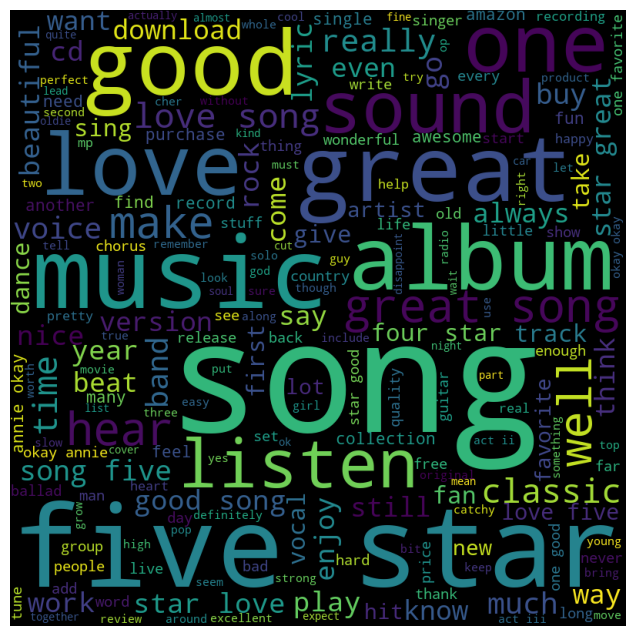

In [96]:
#Code take from GFG to generate Word Cloud

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in ptext:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

#Generate word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
#Plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
 
plt.show()